# BiologDataAnalysis

This notebook process the raw data from a biolog plate reader assay. 

###### Jeffrey Czajka - March 8 2023

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

load biology data - for Plate PM1 and PM2.

In [2]:
biologData = pd.read_csv('csvOfFinalizedData.csv')

In [3]:
biologData.head()

Plate:                A     1.3 PlateFormat Endpoint Absorbance     Raw  \
0    NaN  Temperature(¡C)  1.0000           2        3          4       5   
1    NaN             23.6  0.1031      0.1121   0.1003     0.0986  0.0995   
2    NaN              NaN  0.1082      0.1011   0.0994      0.099  0.0991   
3    NaN              NaN  0.0992      0.1006   0.0998     0.1208  0.1016   
4    NaN              NaN  0.0995      0.1036   0.0995     0.0996  0.1133   

    FALSE       1  Unnamed: 9  ...      12      96     1.2       8  \
0       6  7.0000      8.0000  ...  3.0000  4.0000  5.0000  6.0000   
1  0.1009  0.0988      0.0988  ...  0.1004  0.0991  0.0989  0.1002   
2  0.1004  0.1019      0.1309  ...  0.1024  0.0980  0.0979  0.1006   
3  0.1015  0.1027      0.1042  ...  0.1104  0.1014  0.1013  0.1017   
4  0.1013  0.1030      0.1026  ...  0.0994  0.1005  0.1130  0.1019   

   Unnamed: 21 Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  
0       7.0000      8.0000       9.0000      10.0000      11.0000      12.0000  
1       0.0989      0.0987       0.0980       0.0997       0.0974       0.0986  
2       0.2214      0.1025       0.0994       0.0994       0.0982       0.0982  
3       0.1025      0.1038       0.1002       0.0998       0.1017       0.0976  
4       0.1031      0.1028       0.1014       0.1010       0.1034       0.0989  

[5 rows x 27 columns]

### used in downstream plotting.
Single column per data type. Output is a plate with columns for each data point. 

In [4]:
# intialize dict. 
dfs_590 = defaultdict(lambda: defaultdict(dict))
dfs_750 = defaultdict(lambda: defaultdict(dict))

# initialize dataframes for holding data. 
PlateA_590,PlateB_590,PlateC_590,PlateD_590,PlateE_590,PlateF_590 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
PlateA_750,PlateB_750,PlateC_750,PlateD_750,PlateE_750,PlateF_750 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

# track which plate we are on.
onIterationA = 0

# track the timepoint we are on. 
tp = 0

# open file.
with open('csvOfFinalizedData.csv') as fp:
    counter = 0
    
    # iterate through file.
    for enum,row in enumerate(fp):
        data,data2 = [],[]

        # gather data to tell which plate we are.
        plate = row.strip().split(',')[1]
        
        # tracking the plate. 
        if (row.strip().split(',')[0] == 'Plate:') | (enum==0):
            plate_tracker = plate

        if plate == 'A':
            onIterationA = 1
            continue

        
        if (plate == 'Temperature(Â¡C)') | (plate == 'Temperature(¡C)') |(row.strip().split(',')[0] == '~End') |  (row.strip().split(',')[0]== 'Plate:') | ((row.strip().split(',')[3] == '')):
            headers = row.strip().split(',')[2:14]
        
        # skipping line. 
        if (plate == 'Temperature(Â¡C)') | (plate == 'Temperature(¡C)') |(row.strip().split(',')[0] == '~End') |  (row.strip().split(',')[0]== 'Plate:') | ((row.strip().split(',')[3] == '')):
            continue        
        
 
        
        if (onIterationA==1):
            
            # accumulate data. 
            count = 0
            while count<8:
                data.append(row.strip().split(',')[2:14])
                
                data2.append(row.strip().split(',')[15:28])
                
                row = next(fp)
                count+=1

            # make the plate a single column    
            temp_590 = [item for sublist in data for item in sublist]
            temp_750 = [item for sublist in data2 for item in sublist]

            temp_590 = pd.DataFrame(temp_590)
            temp_750 = pd.DataFrame(temp_750)            

            if plate_tracker == 'A':
                if counter == 0:
                    PlateA_590 = temp_590.copy()
                else:
                    PlateA_590 = pd.concat([PlateA_590,temp_590],axis=1,ignore_index=True)
                    
            if plate_tracker == 'B':
                if counter == 0:
                    PlateB_590 = temp_590.copy()
                else:
                    PlateB_590 = pd.concat([PlateB_590,temp_590],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'C':
                if counter == 0:
                    PlateC_590 = temp_590.copy()
                else:
                    PlateC_590 = pd.concat([PlateC_590,temp_590],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'D':
                if counter == 0:
                    PlateD_590 = temp_590.copy()
                else:
                    PlateD_590 = pd.concat([PlateD_590,temp_590],axis=1,ignore_index=True)
           
            if plate_tracker == 'E':
                if counter == 0:
                    PlateE_590 = temp_590.copy()
                else:
                    PlateE_590 = pd.concat([PlateE_590,temp_590],axis=1,ignore_index=True)
            
            if plate_tracker == 'F':
                if counter == 0:
                    PlateF_590 = temp_590.copy()
                else:
                    PlateF_590 = pd.concat([PlateF_590,temp_590],axis=1,ignore_index=True)

                    
                    
            if plate_tracker == 'A':
                if counter == 0:
                    PlateA_750 = temp_750.copy()
                else:
                    PlateA_750 = pd.concat([PlateA_750,temp_750],axis=1,ignore_index=True)
                    
            if plate_tracker == 'B':
                if counter == 0:
                    PlateB_750 = temp_750.copy()
                else:
                    PlateB_750 = pd.concat([PlateB_750,temp_750],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'C':
                if counter == 0:
                    PlateC_750 = temp_750.copy()
                else:
                    PlateC_750 = pd.concat([PlateC_750,temp_750],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'D':
                if counter == 0:
                    PlateD_750 = temp_750.copy()
                else:
                    PlateD_750 = pd.concat([PlateD_750,temp_750],axis=1,ignore_index=True)
           
            if plate_tracker == 'E':
                if counter == 0:
                    PlateE_750 = temp_750.copy()
                else:
                    PlateE_750 = pd.concat([PlateE_750,temp_750],axis=1,ignore_index=True)
            
            if plate_tracker == 'F':
                if counter == 0:
                    PlateF_750 = temp_750.copy()
                else:
                    PlateF_750 = pd.concat([PlateF_750,temp_750],axis=1,ignore_index=True)
                    
                    
                    
                    
                    
                    

            counter += 1

            if plate_tracker == 'F':
                onIterationA = 0
                tp += 1

            continue
#             print(plate_tracker)
            
    

In [5]:
PlateB_590

0       1       2       3       4       5       6       7       8   \
0   0.0992  0.2767  0.0778  0.0863  0.0953  0.0903   0.073  0.0864  0.0895   
1   0.1075  0.2381  0.2292  0.2716   0.344  0.3827  0.3368  0.3421  0.3138   
2   0.1001  0.2323  0.1582  0.1778  0.1937  0.1956  0.1808  0.1438  0.1131   
3   0.1023  0.2307  0.1557  0.1643  0.1685  0.1678  0.1168  0.1094  0.0989   
4   0.0988  0.2491  0.1658  0.1836  0.2113  0.2538  0.3883  0.3932   0.552   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
91  0.1036  0.2253  0.1869  0.2169  0.2527  0.2594  0.2482  0.1974  0.1758   
92   0.144  0.2261  0.1577  0.1976  0.2343  0.2402  0.2483  0.1626   0.123   
93  0.1013  0.2317  0.1517  0.1673   0.185  0.1857  0.1547  0.1284  0.0943   
94  0.1051  0.2488  0.1139  0.1185  0.1234  0.1245  0.1132   0.085  0.1548   
95   0.104  0.1253  0.1318  0.1408  0.1445  0.1349  0.1086  0.0936  0.0916   

        9       10      11      12      13      14  
0   0.1071  0.1134  0.1175  0.0587  0.0608  0.0583  
1   0.3131  0.3297  0.3374  0.3631  0.3877  0.4011  
2   0.0858  0.0781  0.0756  0.0984  0.1335  0.4002  
3    0.087  0.0846  0.0795  0.0812  0.0911  0.0911  
4   0.6107   0.804  0.3895  0.3542  0.3285  0.3298  
..     ...     ...     ...     ...     ...     ...  
91   0.182  0.1828  0.1858  0.1946  0.2056  0.2212  
92  0.1266  0.1216  0.1197  0.1231  0.1324  0.1536  
93  0.1006  0.1016  0.1037  0.1083  0.1191  0.1321  
94  0.1767  0.1567  0.1645  0.2003  0.1981  0.1761  
95  0.1024  0.1141  0.1187  0.1164  0.0497  0.0578  

[96 rows x 15 columns]

timepoints

In [6]:
tp = [0,5,18,26.5,42.5,54,75,96.5,120.25,141,169.5,193,219,244.5,286]

input the carbon source to plates. 

In [7]:
legend = well_sources = ['Negative Control',
'L-Arabinose  ',
'N-Acetyl-DGlucosamine  ',
'D-Saccharic Acid',
'Succinic Acid',
'D-Galactose  ',
'L-Aspartic Acid',
'L-Proline  ',
'D-Alanine  ',
'D-Trehalose  ',
'D-Mannose  ',
'Dulcitol  ',
'D-Serine  ',
'D-Sorbitol  ',
'Glycerol  ',
'L-Fucose  ',
'D-Glucuronic Acid',
'D-Gluconic Acid',
'D,L-a-GlycerolPhosphate  ',
'D-Xylose  ',
'L-Lactic Acid',
'Formic Acid',
'D--Mannitol  ',
'L-Glutamic Acid',
'D--Glucose-6- Phosphate',
'D--Galactonic Acid-g-Lactone',
'D-,L-Malic Acid',
'D--Ribose  ',
'Tween 20',
'L-Rhamnose  ',
'D--Fructose  ',
'Acetic Acid',
'a-D-Glucose  ',
'Maltose  ',
'D--Melibiose  ',
'Thymidine  ',
'L-Asparagine  ',
'D-Aspartic Acid',
'D--Glucosaminic Acid',
'1,2-Propanediol  ',
'Tween 40',
'a-Keto-Glutaric Acid',
'a-Keto-Butyric Acid',
'a-Methyl-DGalactoside  ',
'a-D-Lactose  ',
'Lactulose  ',
'Sucrose  ',
'Uridine  ',
'L-Glutamine  ',
'm-Tartaric Acid',
'D--Glucose-1- Phosphate',
'D--Fructose-6- Phosphate',
'Tween 80',
'a-Hydroxy Glutaric Acid-g- Lactone',
'a-Hydroxy Butyric Acid',
'b-Methyl-DGlucoside  ',
'Adonitol  ',
'Maltotriose  ',
'2-Deoxy Adenosine',
'Adenosine  ',
'Glycyl-L-Aspartic Acid',
'Citric Acid',
'm-Inositol  ',
'D--Threonine  ',
'Fumaric Acid',
'Bromo Succinic Acid',
'Propionic Acid',
'Mucic Acid',
'Glycolic Acid',
'Glyoxylic Acid',
'D--Cellobiose  ',
'Inosine  ',
'Glycyl-LGlutamic Acid',
'Tricarballylic Acid',
'L-Serine  ',
'L-Threonine  ',
'L-Alanine  ',
'L-Alanyl-Glycine  ',
'Acetoacetic Acid',
'N-Acetyl-b-DMannosamine  ',
'Mono Methyl Succinate',
'Methyl Pyruvate',
'D--Malic Acid',
'L-Malic Acid',
'Glycyl-L-Proline  ',
'p-Hydroxy Phenyl Acetic Acid',
'm-Hydroxy Phenyl Acetic Acid',
'Tyramine  ',
'D--Psicose  ',
'L-Lyxose  ',
'Glucuronamide  ',
'Pyruvic Acid',
'L-Galactonic Acid-g-Lactone',
'D--Galacturonic Acid',
'Phenylethylamine  ',
'2-Aminoethanol  ',
'Negative Control2',
'Chondroitin Sulfate C',
'a-Cyclodextrin',
'b-Cyclodextrin',
'g-Cyclodextrin',
'Dextrin',
'Gelatin',
'Glycogen',
'Inulin',
'Laminarin',
'Mannan',
'Pectin',
'N-Acetyl-DGalactosamine',
'N-AcetylNeuraminic Acid',
'b-D-Allose',
'Amygdalin',
'D-Arabinose',
'D-Arabitol',
'L-Arabitol',
'Arbutin',
'2-Deoxy-DRibose',
'i-Erythritol',
'D-Fucose',
'3-0-b-D-Galactopyranosyl-DArabinose',
'Gentiobiose',
'L-Glucose',
'Lactitol',
'D-Melezitose',
'Maltitol',
'A-Methyl-DGlucoside',
'b-Methyl-DGalactoside',
'3-Methyl Glucose',
'b-Methyl-DGlucuronic Acid',
'a-Methyl-DMannoside',
'b-Methyl-DXyloside',
'Palatinose',
'D-Raffinose',
'Salicin',
'Sedoheptulosan',
'L-Sorbose',
'Stachyose',
'D-Tagatose',
'Turanose',
'Xylitol',
'N-Acetyl-DGlucosaminitol',
'g-Amino Butyric Acid',
'd-Amino Valeric Acid',
'Butyric Acid',
'Capric Acid',
'Caproic Acid',
'Citraconic Acid',
'Citramalic Acid',
'D-Glucosamine',
'2-Hydroxy Benzoic Acid',
'4-Hydroxy Benzoic Acid',
'b-Hydroxy Butyric Acid',
'g-Hydroxy Butyric Acid',
'A-Keto-Valeric Acid',
'Itaconic Acid',
'5-Keto-D-Gluconic Acid',
'D-Lactic Acid Methyl Ester',
'Malonic Acid',
'Melibionic Acid',
'Oxalic Acid',
'Oxalomalic Acid',
'Quinic Acid',
'D-Ribono-1,4- Lactone',
'Sebacic Acid',
'Sorbic Acid',
'Succinamic Acid',
'D-Tartaric Acid',
'L-Tartaric Acid',
'Acetamide',
'L-Alaninamide',
'N-Acetyl-LGlutamic Acid',
'L-Arginine',
'Glycine',
'L-Histidine',
'L-Homoserine',
'Hydroxy-LProline',
'L-Isoleucine',
'L-Leucine',
'L-Lysine',
'L-Methionine',
'L-Ornithine',
'L-Phenylalanine',
'L-Pyroglutamic Acid',
'L-Valine',
'D,L-Carnitine',
'Sec-Butylamine',
'D,L-Octopamine',
'Putrescine',
'Dihydroxy Acetone',
'2,3-Butanediol',
'2,3-Butanedione',
'3-Hydroxy 2-Butanon',
]

In [8]:
plate_well = [
    'PM1_A1',
'PM1_A2',
'PM1_A3',
'PM1_A4',
'PM1_A5',
'PM1_A6',
'PM1_A7',
'PM1_A8',
'PM1_A9',
'PM1_A10',
'PM1_A11',
'PM1_A12',
'PM1_B1',
'PM1_B2',
'PM1_B3',
'PM1_B4',
'PM1_B5',
'PM1_B6',
'PM1_B7',
'PM1_B8',
'PM1_B9',
'PM1_B10',
'PM1_B11',
'PM1_B12',
'PM1_C1',
'PM1_C2',
'PM1_C3',
'PM1_C4',
'PM1_C5',
'PM1_C6',
'PM1_C7',
'PM1_C8',
'PM1_C9',
'PM1_C10',
'PM1_C11',
'PM1_C12',
'PM1_D1',
'PM1_D2',
'PM1_D3',
'PM1_D4',
'PM1_D5',
'PM1_D6',
'PM1_D7',
'PM1_D8',
'PM1_D9',
'PM1_D10',
'PM1_D11',
'PM1_D12',
'PM1_E1',
'PM1_E2',
'PM1_E3',
'PM1_E4',
'PM1_E5',
'PM1_E6',
'PM1_E7',
'PM1_E8',
'PM1_E9',
'PM1_E10',
'PM1_E11',
'PM1_E12',
'PM1_F1',
'PM1_F2',
'PM1_F3',
'PM1_F4',
'PM1_F5',
'PM1_F6',
'PM1_F7',
'PM1_F8',
'PM1_F9',
'PM1_F10',
'PM1_F11',
'PM1_F12',
'PM1_G1',
'PM1_G2',
'PM1_G3',
'PM1_G4',
'PM1_G5',
'PM1_G6',
'PM1_G7',
'PM1_G8',
'PM1_G9',
'PM1_G10',
'PM1_G11',
'PM1_G12',
'PM1_H1',
'PM1_H2',
'PM1_H3',
'PM1_H4',
'PM1_H5',
'PM1_H6',
'PM1_H7',
'PM1_H8',
'PM1_H9',
'PM1_H10',
'PM1_H11',
'PM1_H12',
'PM2_A1',
'PM2_A2',
'PM2_A3',
'PM2_A4',
'PM2_A5',
'PM2_A6',
'PM2_A7',
'PM2_A8',
'PM2_A9',
'PM2_A10',
'PM2_A11',
'PM2_A12',
'PM2_B1',
'PM2_B2',
'PM2_B3',
'PM2_B4',
'PM2_B5',
'PM2_B6',
'PM2_B7',
'PM2_B8',
'PM2_B9',
'PM2_B10',
'PM2_B11',
'PM2_B12',
'PM2_C1',
'PM2_C2',
'PM2_C3',
'PM2_C4',
'PM2_C5',
'PM2_C6',
'PM2_C7',
'PM2_C8',
'PM2_C9',
'PM2_C10',
'PM2_C11',
'PM2_C12',
'PM2_D1',
'PM2_D2',
'PM2_D3',
'PM2_D4',
'PM2_D5',
'PM2_D6',
'PM2_D7',
'PM2_D8',
'PM2_D9',
'PM2_D10',
'PM2_D11',
'PM2_D12',
'PM2_E1',
'PM2_E2',
'PM2_E3',
'PM2_E4',
'PM2_E5',
'PM2_E6',
'PM2_E7',
'PM2_E8',
'PM2_E9',
'PM2_E10',
'PM2_E11',
'PM2_E12',
'PM2_F1',
'PM2_F2',
'PM2_F3',
'PM2_F4',
'PM2_F5',
'PM2_F6',
'PM2_F7',
'PM2_F8',
'PM2_F9',
'PM2_F10',
'PM2_F11',
'PM2_F12',
'PM2_G1',
'PM2_G2',
'PM2_G3',
'PM2_G4',
'PM2_G5',
'PM2_G6',
'PM2_G7',
'PM2_G8',
'PM2_G9',
'PM2_G10',
'PM2_G11',
'PM2_G12',
'PM2_H1',
'PM2_H2',
'PM2_H3',
'PM2_H4',
'PM2_H5',
'PM2_H6',
'PM2_H7',
'PM2_H8',
'PM2_H9',
'PM2_H10',
'PM2_H11',
'PM2_H12'

]

In [9]:
# use number as the legend (for post processing. )

legend = np.arange(0,192)

In [10]:
# use these indeces to replace the plate with the source name. 

PlateA_590.index = legend[0:96]
PlateB_590.index = legend[0:96]
PlateC_590.index = legend[0:96]
PlateA_750.index = legend[0:96]
PlateB_750.index = legend[0:96]
PlateC_750.index = legend[0:96]

PlateD_590.index = legend[96:192]
PlateE_590.index = legend[96:192]
PlateF_590.index = legend[96:192]
PlateD_750.index = legend[96:192]
PlateE_750.index = legend[96:192]
PlateF_750.index = legend[96:192]

In [11]:
# # use these indeces to replace the plate with the well name. 

# PlateA_590.index = plate_well[0:96]
# PlateB_590.index = plate_well[0:96]
# PlateC_590.index = plate_well[0:96]
# PlateA_750.index = plate_well[0:96]
# PlateB_750.index = plate_well[0:96]
# PlateC_750.index = plate_well[0:96]

# PlateD_590.index = plate_well[96:192]
# PlateE_590.index = plate_well[96:192]
# PlateF_590.index = plate_well[96:192]
# PlateD_750.index = plate_well[96:192]
# PlateE_750.index = plate_well[96:192]
# PlateF_750.index = plate_well[96:192]



In [12]:
legend[96:192]

array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191])

Visualizing data. We want to ensure that individual sources ahd significant growth above the control conditions. 

In [13]:
PlateA_590=PlateA_590.astype(float)

In [14]:
PlateA_590

0       1       2       3       4       5       6       7       8   \
0   0.1031  0.1523  0.1416  0.1505  0.1256  0.1047  0.0859  0.0931  0.1109   
1   0.1121  0.1846  0.2217  0.2620  0.3284  0.3353  0.3440  0.3007  0.3045   
2   0.1003  0.1373  0.1512  0.1741  0.1923  0.1875  0.1761  0.1267  0.0809   
3   0.0986  0.1678  0.1549  0.1696  0.1771  0.1679  0.1266  0.1026  0.0917   
4   0.0995  0.1464  0.1628  0.1855  0.2212  0.2741  0.3937  0.3764  0.5552   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
91  0.1022  0.1782  0.0746  0.1862  0.2090  0.2064  0.1605  0.1392  0.1385   
92  0.1025  0.1672  0.1989  0.2450  0.2907  0.2869  0.1730  0.1320  0.1254   
93  0.1032  0.1712  0.0740  0.0927  0.1143  0.1287  0.1239  0.0992  0.0989   
94  0.1022  0.2181  0.1396  0.1475  0.1551  0.1509  0.1143  0.0896  0.1674   
95  0.1045  0.1387  0.1312  0.1303  0.1236  0.1141  0.0943  0.1046  0.1088   

        9       10      11      12      13      14  
0   0.0925  0.1272  0.0593  0.0542  0.0559  0.0553  
1   0.3124  0.3482  0.3608  0.3493  0.2645  0.0856  
2   0.0660  0.0821  0.0862  0.0897  0.0979  0.1039  
3   0.0696  0.0872  0.0851  0.0898  0.0967  0.1078  
4   0.3684  0.3926  0.4070  0.4161  0.4003  0.3676  
..     ...     ...     ...     ...     ...     ...  
91  0.1451  0.1530  0.1531  0.1679  0.1784  0.1858  
92  0.1225  0.1276  0.1268  0.1410  0.1496  0.1636  
93  0.1009  0.1079  0.1076  0.1216  0.1293  0.1442  
94  0.1530  0.1638  0.1928  0.2047  0.1902  0.1183  
95  0.1153  0.1304  0.1309  0.0647  0.0604  0.0565  

[96 rows x 15 columns]

#### carbon sources 590 construction and plotting for PM plate 1. 

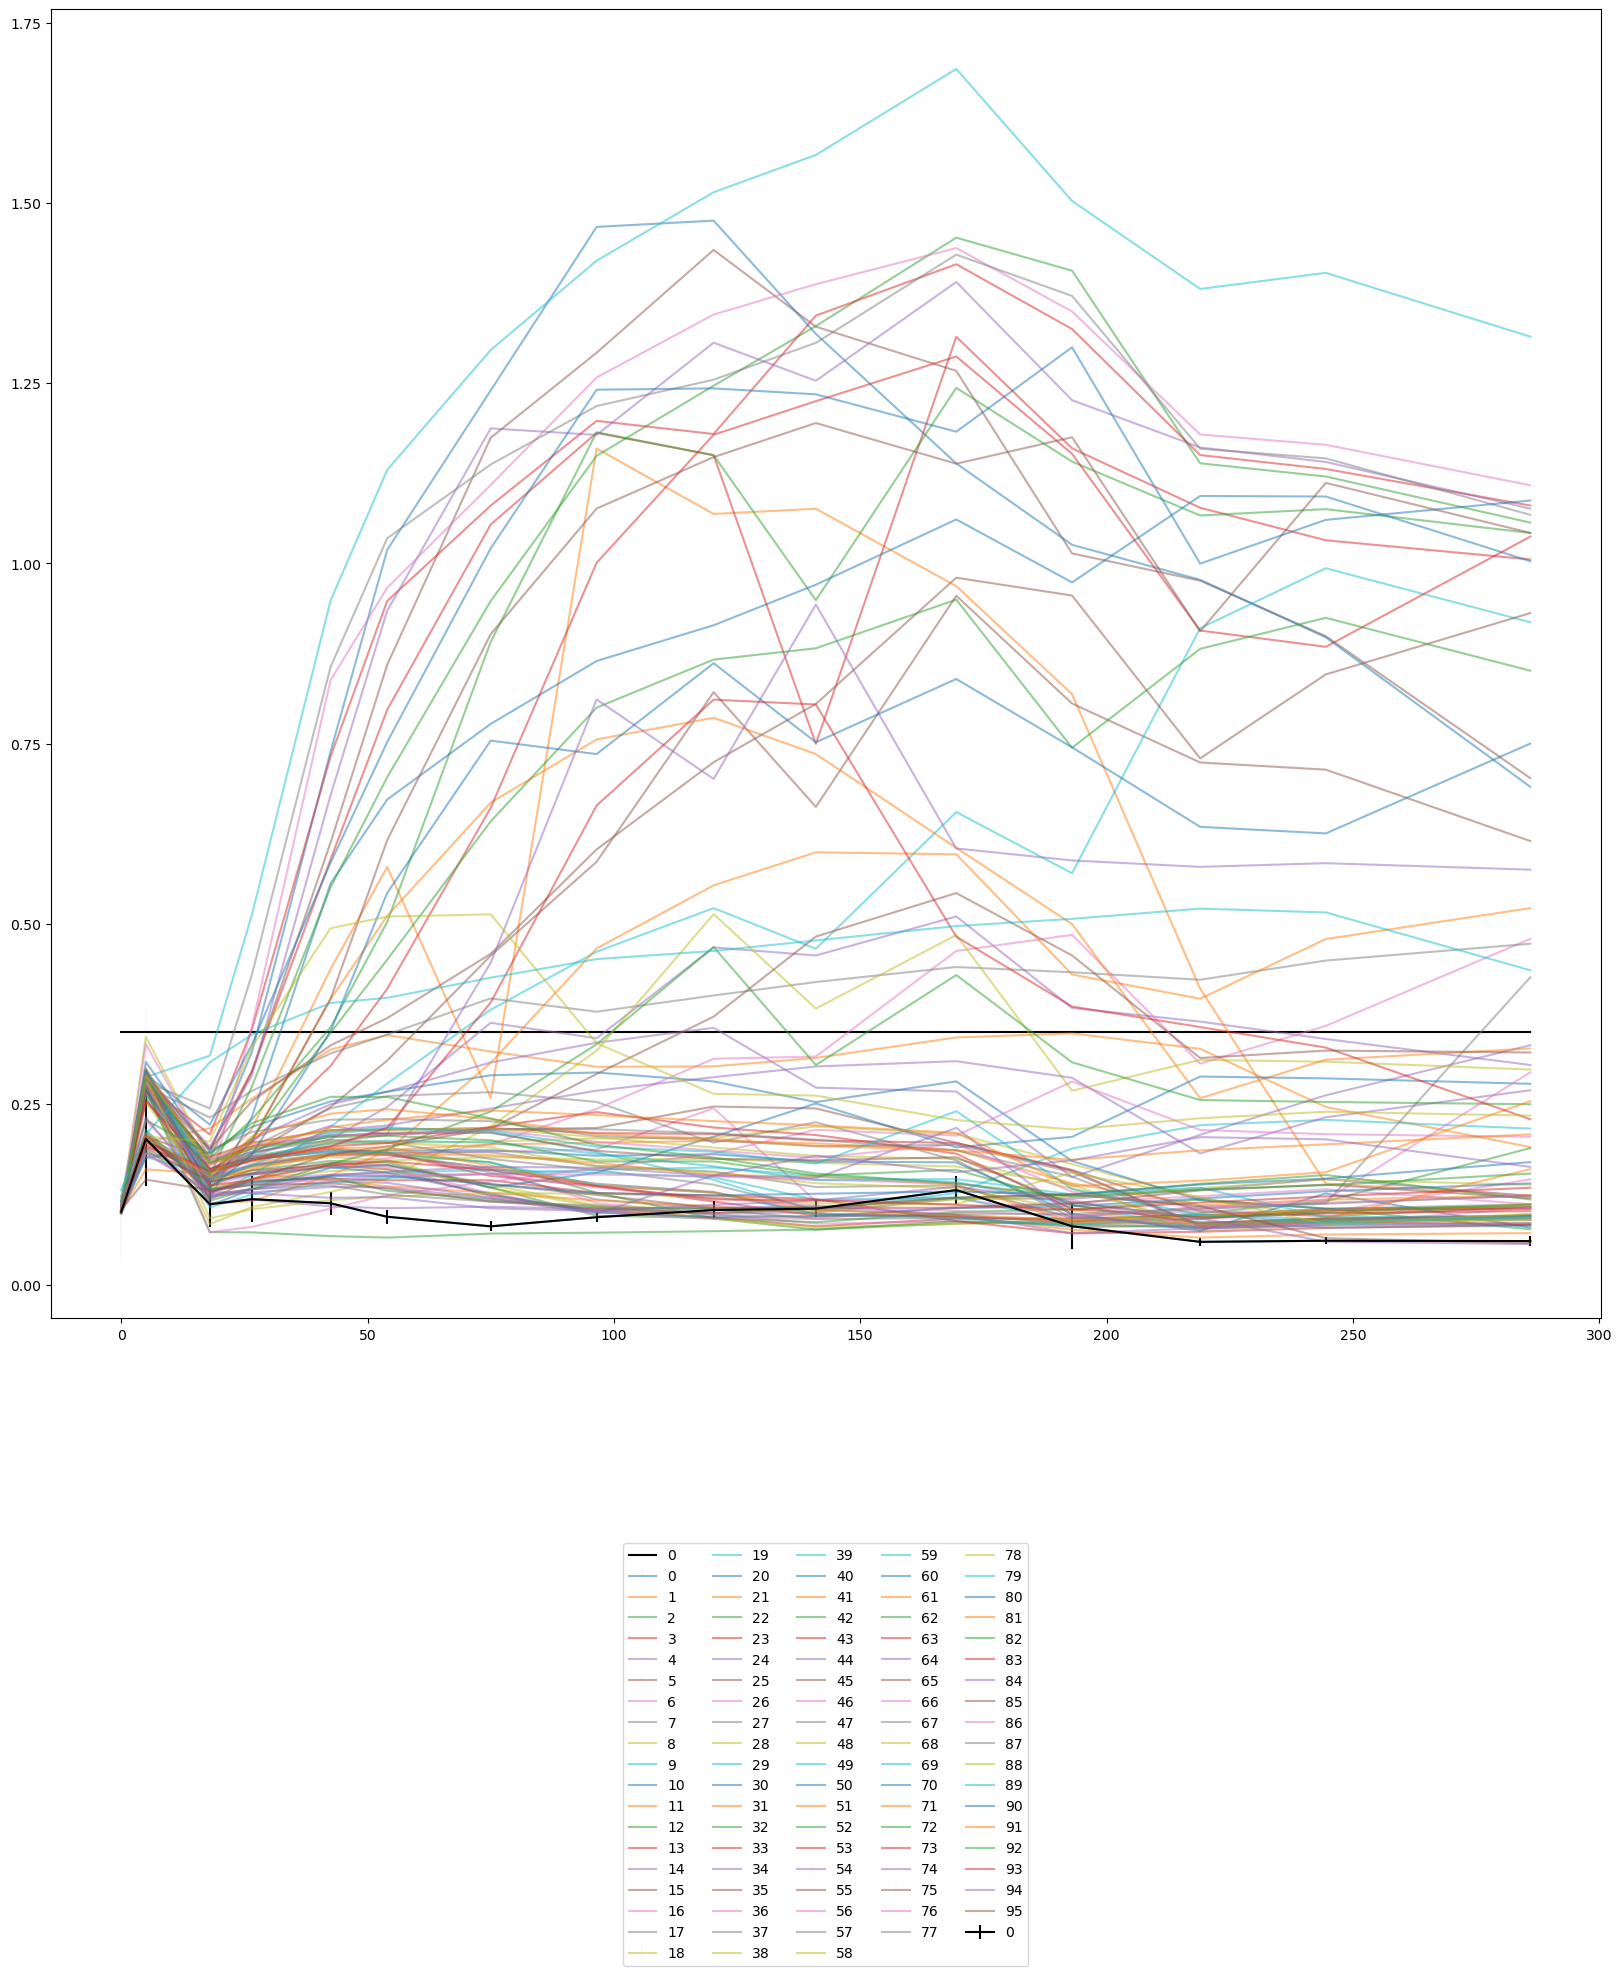

In [15]:
# graph and plot PM 1. 
    
x_590 = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float)],sort=False).groupby(level=0).mean()
# x = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).mean()
# y = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).std()
y_590 = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float)],sort=False).groupby(level=0).std()
x_590.columns = tp
y_590.columns = tp
# x1 = 

ax = x_590.T.plot(legend=True,yerr = y_590,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
x_590.loc[0].plot(ax=ax,color='k',yerr = y_590.loc[0],legend=False)
# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.35
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)

ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


#### 750 nm graph - PM1. 

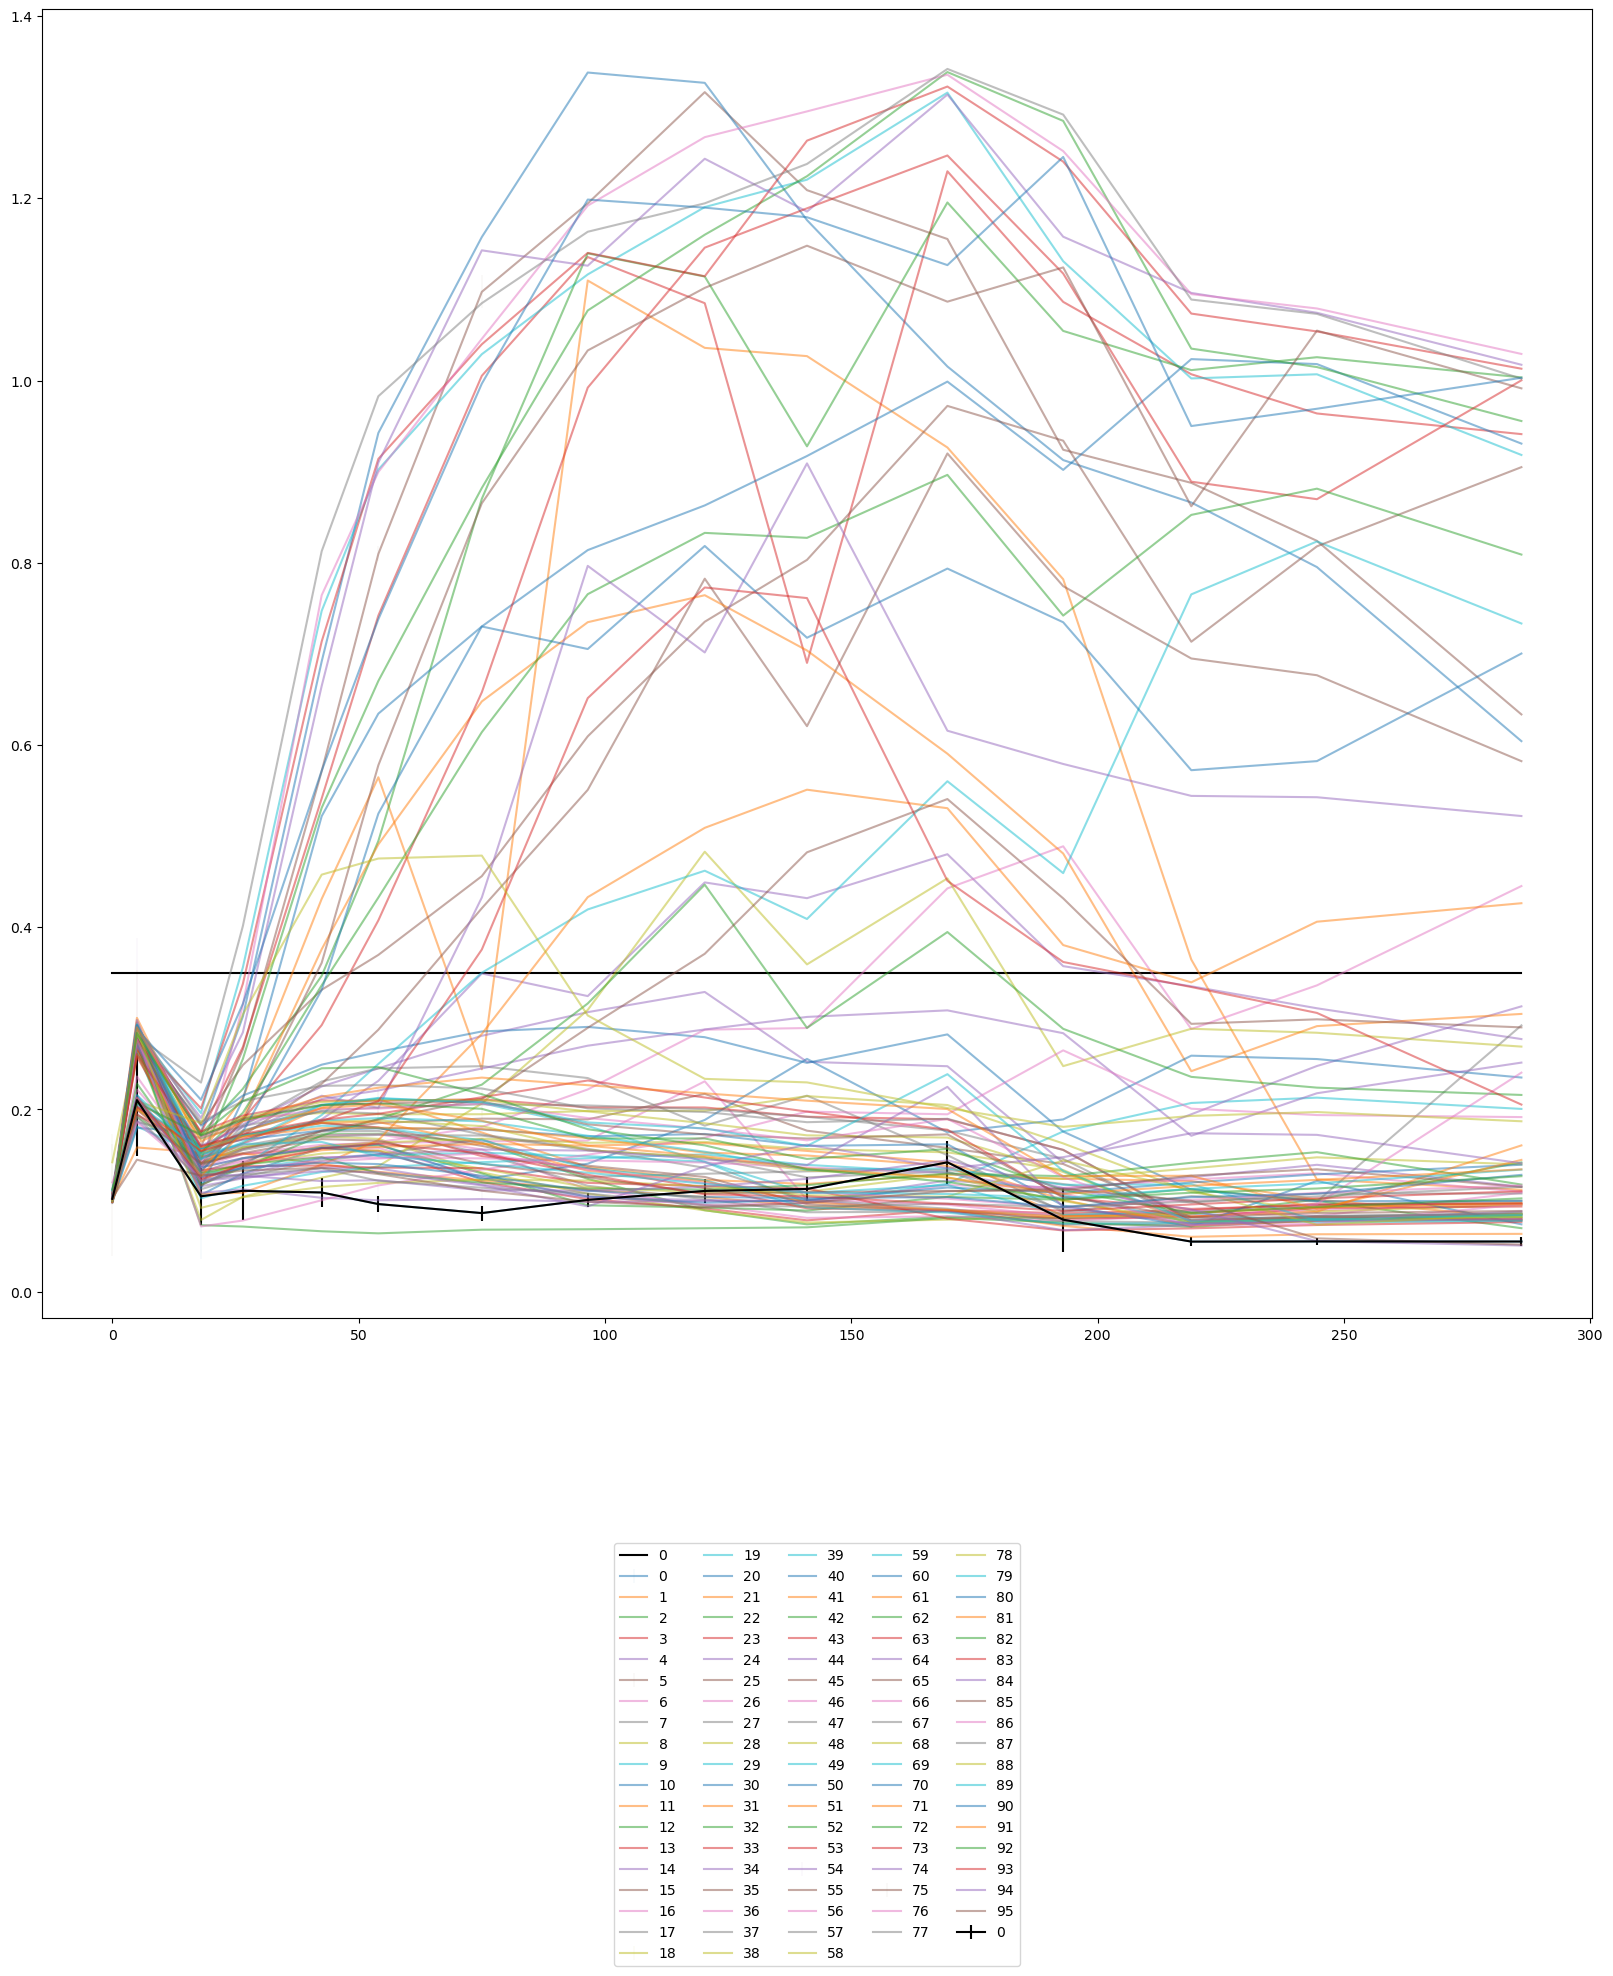

In [16]:

    
# x_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).mean()
# y_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).std()
x_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)],sort=False).groupby(level=0).mean()
y_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)],sort=False).groupby(level=0).std()


x_750.columns = tp
y_750.columns = tp
# x1 = 

ax = x_750.T.plot(legend=True,yerr = y_750,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)

# negative control. 
x_750.loc[0].plot(ax=ax,color='k',yerr = y_750.loc[0],legend=False)

# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.35
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)

ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


#### lets look at the highest the negative control reached across all three plates. 


In [17]:
# 750 nm. 
print(PlateA_750.loc[0],PlateB_750.loc[0],PlateC_750.loc[0])

0     0.1033
1     0.1684
2     0.1357
3     0.1441
4     0.1239
5     0.1063
6     0.0917
7     0.0988
8     0.1177
9     0.0993
10    0.1377
11    0.0579
12    0.0493
13    0.0504
14    0.0499
Name: 0, dtype: object 0      0.101
1     0.2807
2     0.0736
3     0.0797
4     0.0921
5      0.092
6     0.0767
7     0.0942
8     0.0951
9     0.1137
10     0.121
11    0.1195
12    0.0574
13     0.057
14    0.0549
Name: 0, dtype: object 0     0.1014
1     0.1818
2     0.1048
3     0.1085
4     0.1107
5     0.0902
6     0.0904
7     0.1093
8     0.1189
9     0.1252
10    0.1673
11    0.0596
12    0.0582
13    0.0581
14    0.0604
Name: 0, dtype: object


In [18]:
# 590 nm wavelength. 
print(PlateA_590.loc[0],PlateB_590.loc[0],PlateC_590.loc[0])

0     0.1031
1     0.1523
2     0.1416
3     0.1505
4     0.1256
5     0.1047
6     0.0859
7     0.0931
8     0.1109
9     0.0925
10    0.1272
11    0.0593
12    0.0542
13    0.0559
14    0.0553
Name: 0, dtype: float64 0     0.0992
1     0.2767
2     0.0778
3     0.0863
4     0.0953
5     0.0903
6      0.073
7     0.0864
8     0.0895
9     0.1071
10    0.1134
11    0.1175
12    0.0587
13    0.0608
14    0.0583
Name: 0, dtype: object 0     0.1002
1     0.1774
2     0.1148
3     0.1187
4     0.1174
5     0.0872
6     0.0834
7     0.1008
8     0.1098
9     0.1164
10    0.1526
11     0.066
12     0.065
13    0.0657
14    0.0676
Name: 0, dtype: object


the highest nm reached ~ 0.15 for both conditions. Set 0.35 as minimal for growth. 

In [19]:
temp_750 = x_750.copy()
temp_590 = x_590.copy()

In [20]:
temp_750['source']=temp_750.index
temp_750.index = plate_well[0:96]
temp_750['well_sources'] = well_sources[0:96]
temp_590['source']=temp_590.index
temp_590.index = plate_well[0:96]
temp_590['well_sources'] = well_sources[0:96]

#### obtain data above thresholds.

In [22]:
tp

[0, 5, 18, 26.5, 42.5, 54, 75, 96.5, 120.25, 141, 169.5, 193, 219, 244.5, 286]

In [23]:
# drop late datapoints. and remove noisy data. Time point zero and 5 were originally measured with the plate lid on.  

x2_590 = x_590.drop(columns=[0,5,193,219,244.5,286])
x2_750 = x_750.drop(columns=[0,5,193,219,244.5,286])

# y2 = y.drop(columns=[120,144,168])

obtain data above thresholds. Ensure that it is more than one datapoint. 

In [24]:
threshold = 0.35
index_590 = x2_590.gt(threshold).sum(axis=1)>1
index_750 = x2_750.gt(threshold).sum(axis=1)>1
# index.to_csv('Biolog_gt_35_TF_numericalIndex.csv')

In [25]:
index_590.sum()

31

In [26]:
index_750.sum()

29

In [27]:
# 94 values matched, thus there are 2 values that do match the growth requirements between 590 and 750 nm. 
(index_750==index_590).sum()

94

In [28]:
ind = index_750[index_750!=index_590]

In [29]:
ind.index.values

array([27, 89])

In [30]:
index_590[ind.index.values]

27    True
89    True
dtype: bool

In [31]:
index_750[ind.index.values]

27    False
89    False
dtype: bool

In [32]:
temp_590.iloc[0]

0.0                     0.100833
5.0                     0.202133
18.0                      0.1114
26.5                      0.1185
42.5                    0.112767
54.0                    0.094067
75.0                    0.080767
96.5                    0.093433
120.25                    0.1034
141.0                   0.105333
169.5                   0.131067
193.0                   0.080933
219.0                     0.0593
244.5                     0.0608
286.0                     0.0604
source                         0
well_sources    Negative Control
Name: PM1_A1, dtype: object

In [33]:
temp_590.iloc[ind.index.values]

0.0     5.0      18.0      26.5      42.5      54.0      75.0  \
PM1_C4  0.115233  0.2747  0.231667  0.268467  0.320533  0.346833  0.396867   
PM1_H6  0.131267  0.2084  0.308367  0.346600  0.390500  0.397700  0.425600   

            96.5    120.25     141.0     169.5   193.0     219.0     244.5  \
PM1_C4  0.378433  0.400933  0.419600  0.440400  0.4331  0.422733  0.449333   
PM1_H6  0.451367  0.462700  0.477233  0.497233  0.5072  0.521400  0.516100   

           286.0  source well_sources  
PM1_C4  0.472667      27  D--Ribose    
PM1_H6  0.435867      89   L-Lyxose

In [34]:
temp_750.iloc[0]

0.0                       0.1019
5.0                       0.2103
18.0                      0.1047
26.5                    0.110767
42.5                      0.1089
54.0                    0.096167
75.0                    0.086267
96.5                    0.100767
120.25                  0.110567
141.0                   0.112733
169.5                      0.142
193.0                      0.079
219.0                   0.054967
244.5                   0.055167
286.0                   0.055067
source                         0
well_sources    Negative Control
Name: PM1_A1, dtype: object

In [35]:
temp_750.iloc[ind.index.values]

0.0       5.0      18.0      26.5      42.5      54.0      75.0  \
PM1_C4  0.101233  0.274833  0.112467  0.126233  0.144000  0.150800  0.167400   
PM1_H6  0.101200  0.215667  0.150700  0.162033  0.164333  0.148867  0.140333   

            96.5    120.25     141.0     169.5     193.0     219.0     244.5  \
PM1_C4  0.125933  0.129433  0.132067  0.133767  0.118133  0.097767  0.107767   
PM1_H6  0.130533  0.118433  0.108667  0.107200  0.102967  0.112867  0.118900   

           286.0  source well_sources  
PM1_C4  0.107733      27  D--Ribose    
PM1_H6  0.134000      89   L-Lyxose

In [36]:
# new index set these to false
final_TF_values = index_750.copy()
final_TF_values[index_750!=index_590] = False

In [37]:
temp_750['growth'] = final_TF_values.values

#### save the dataframe.

In [38]:
temp_750

0.0       5.0      18.0      26.5      42.5      54.0      75.0  \
PM1_A1   0.101900  0.210300  0.104700  0.110767  0.108900  0.096167  0.086267   
PM1_A2   0.100500  0.205767  0.140667  0.162833  0.202367  0.211333  0.174733   
PM1_A3   0.103933  0.192133  0.141867  0.158067  0.172667  0.173400  0.163600   
PM1_A4   0.100133  0.199733  0.141667  0.150900  0.157733  0.154600  0.120267   
PM1_A5   0.098800  0.202533  0.147167  0.162567  0.189167  0.231400  0.349300   
...           ...       ...       ...       ...       ...       ...       ...   
PM1_H8   0.101100  0.212467  0.126900  0.175600  0.201400  0.205667  0.187633   
PM1_H9   0.112333  0.207333  0.171900  0.209200  0.245200  0.246500  0.216767   
PM1_H10  0.101533  0.213167  0.123567  0.139333  0.157067  0.162500  0.151700   
PM1_H11  0.101867  0.212667  0.121567  0.125633  0.132300  0.131167  0.116667   
PM1_H12  0.102533  0.144867  0.127467  0.133000  0.136100  0.129133  0.110800   

             96.5    120.25     141.0     169.5     193.0     219.0     244.5  \
PM1_A1   0.100767  0.110567  0.112733  0.142000  0.079000  0.054967  0.055167   
PM1_A2   0.136800  0.122733  0.118233  0.128900  0.123967  0.121467  0.101033   
PM1_A3   0.123833  0.089433  0.073900  0.082300  0.080667  0.084800  0.101067   
PM1_A4   0.101600  0.091433  0.078300  0.089667  0.086100  0.089533  0.096467   
PM1_A5   0.324433  0.449200  0.431900  0.480167  0.357300  0.335200  0.311067   
...           ...       ...       ...       ...       ...       ...       ...   
PM1_H8   0.160167  0.148833  0.135200  0.125100  0.107300  0.116200  0.122733   
PM1_H9   0.178333  0.160567  0.134500  0.120500  0.101100  0.108633  0.113233   
PM1_H10  0.128233  0.106833  0.104600  0.096533  0.088600  0.095767  0.102433   
PM1_H11  0.093600  0.137533  0.161367  0.135533  0.147667  0.173900  0.172133   
PM1_H12  0.098767  0.092833  0.097500  0.110200  0.112967  0.099733  0.058533   

            286.0  source                 well_sources  growth  
PM1_A1   0.055067       0             Negative Control   False  
PM1_A2   0.081267       1                L-Arabinose     False  
PM1_A3   0.141867       2      N-Acetyl-DGlucosamine     False  
PM1_A4   0.096500       3             D-Saccharic Acid   False  
PM1_A5   0.277267       4                Succinic Acid    True  
...           ...     ...                          ...     ...  
PM1_H8   0.134267      91                 Pyruvic Acid   False  
PM1_H9   0.126767      92  L-Galactonic Acid-g-Lactone   False  
PM1_H10  0.110267      93         D--Galacturonic Acid   False  
PM1_H11  0.140933      94           Phenylethylamine     False  
PM1_H12  0.051700      95             2-Aminoethanol     False  

[96 rows x 18 columns]

In [39]:
# temp_750.to_csv('plate_1A_carbon_growth_output_750nmData.csv')

Load the second carbon biolog plate 2B

#### carbon sources 590 markering. 

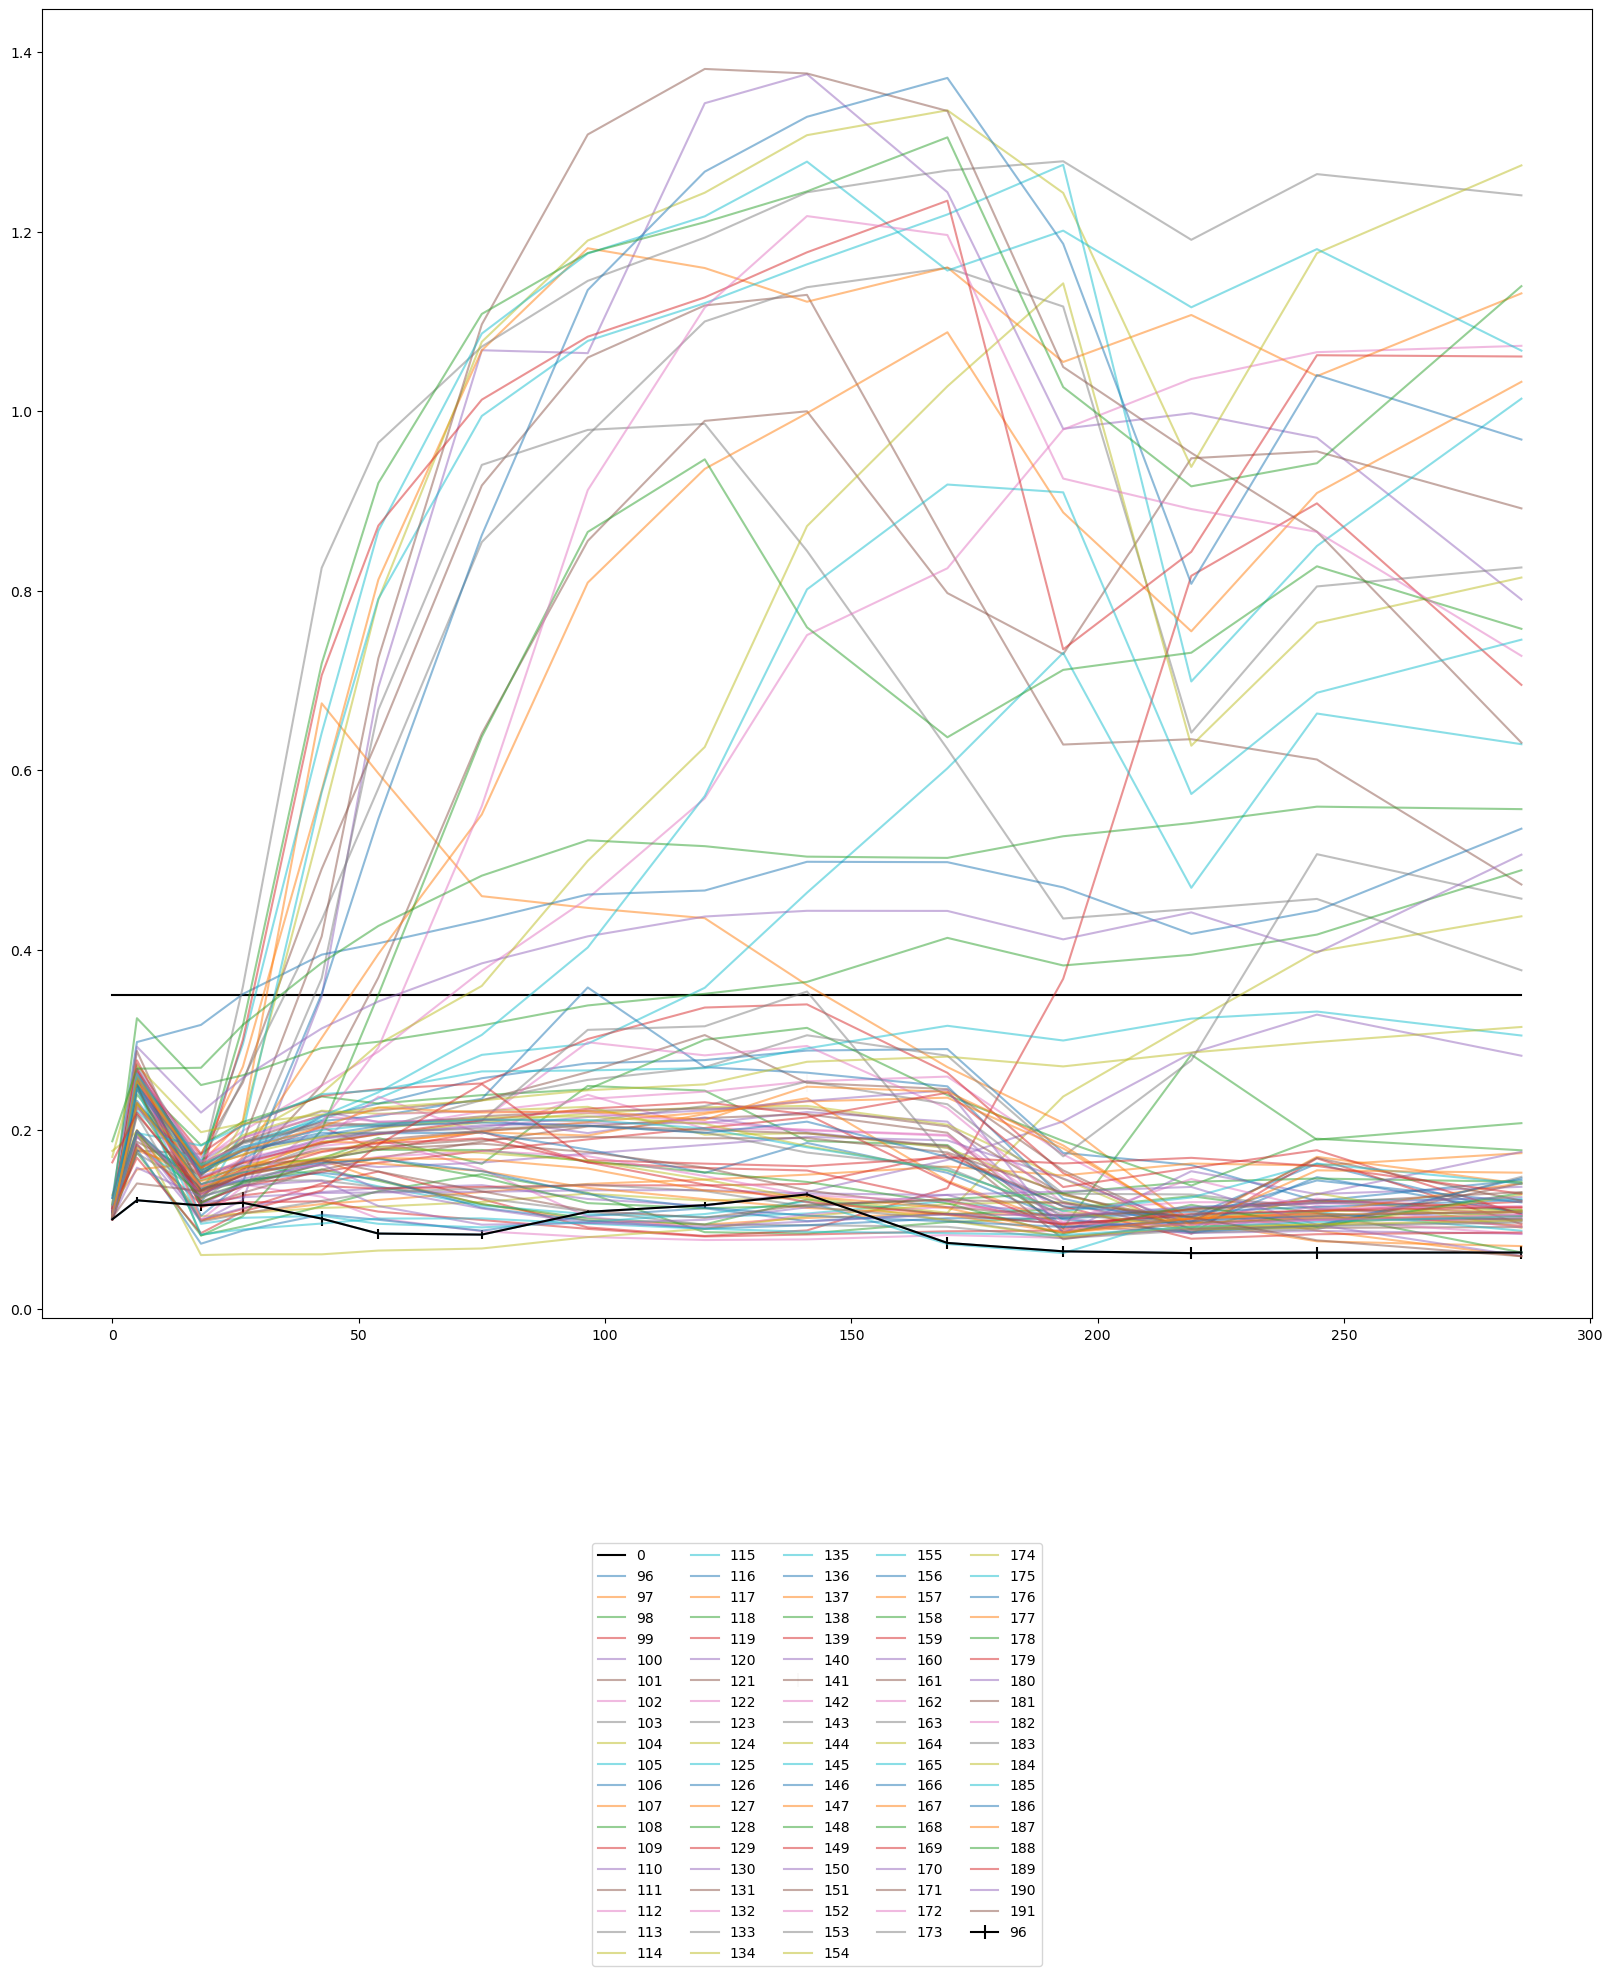

In [40]:

    
x_590 = pd.concat([PlateD_590.astype(float), PlateE_590.astype(float), PlateF_590.astype(float)],sort=False).groupby(level=0).mean()
# x = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).mean()
# y = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).std()
y_590 = pd.concat([PlateD_590.astype(float), PlateE_590.astype(float), PlateF_590.astype(float)],sort=False).groupby(level=0).std()
x_590.columns = tp
y_590.columns = tp
# x1 = 

ax = x_590.T.plot(legend=True,yerr = y_590,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
x_590.iloc[0].plot(ax=ax,color='k',yerr = y_590.iloc[0],legend=False)
# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.35
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)

ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


#### 750 nm graph.

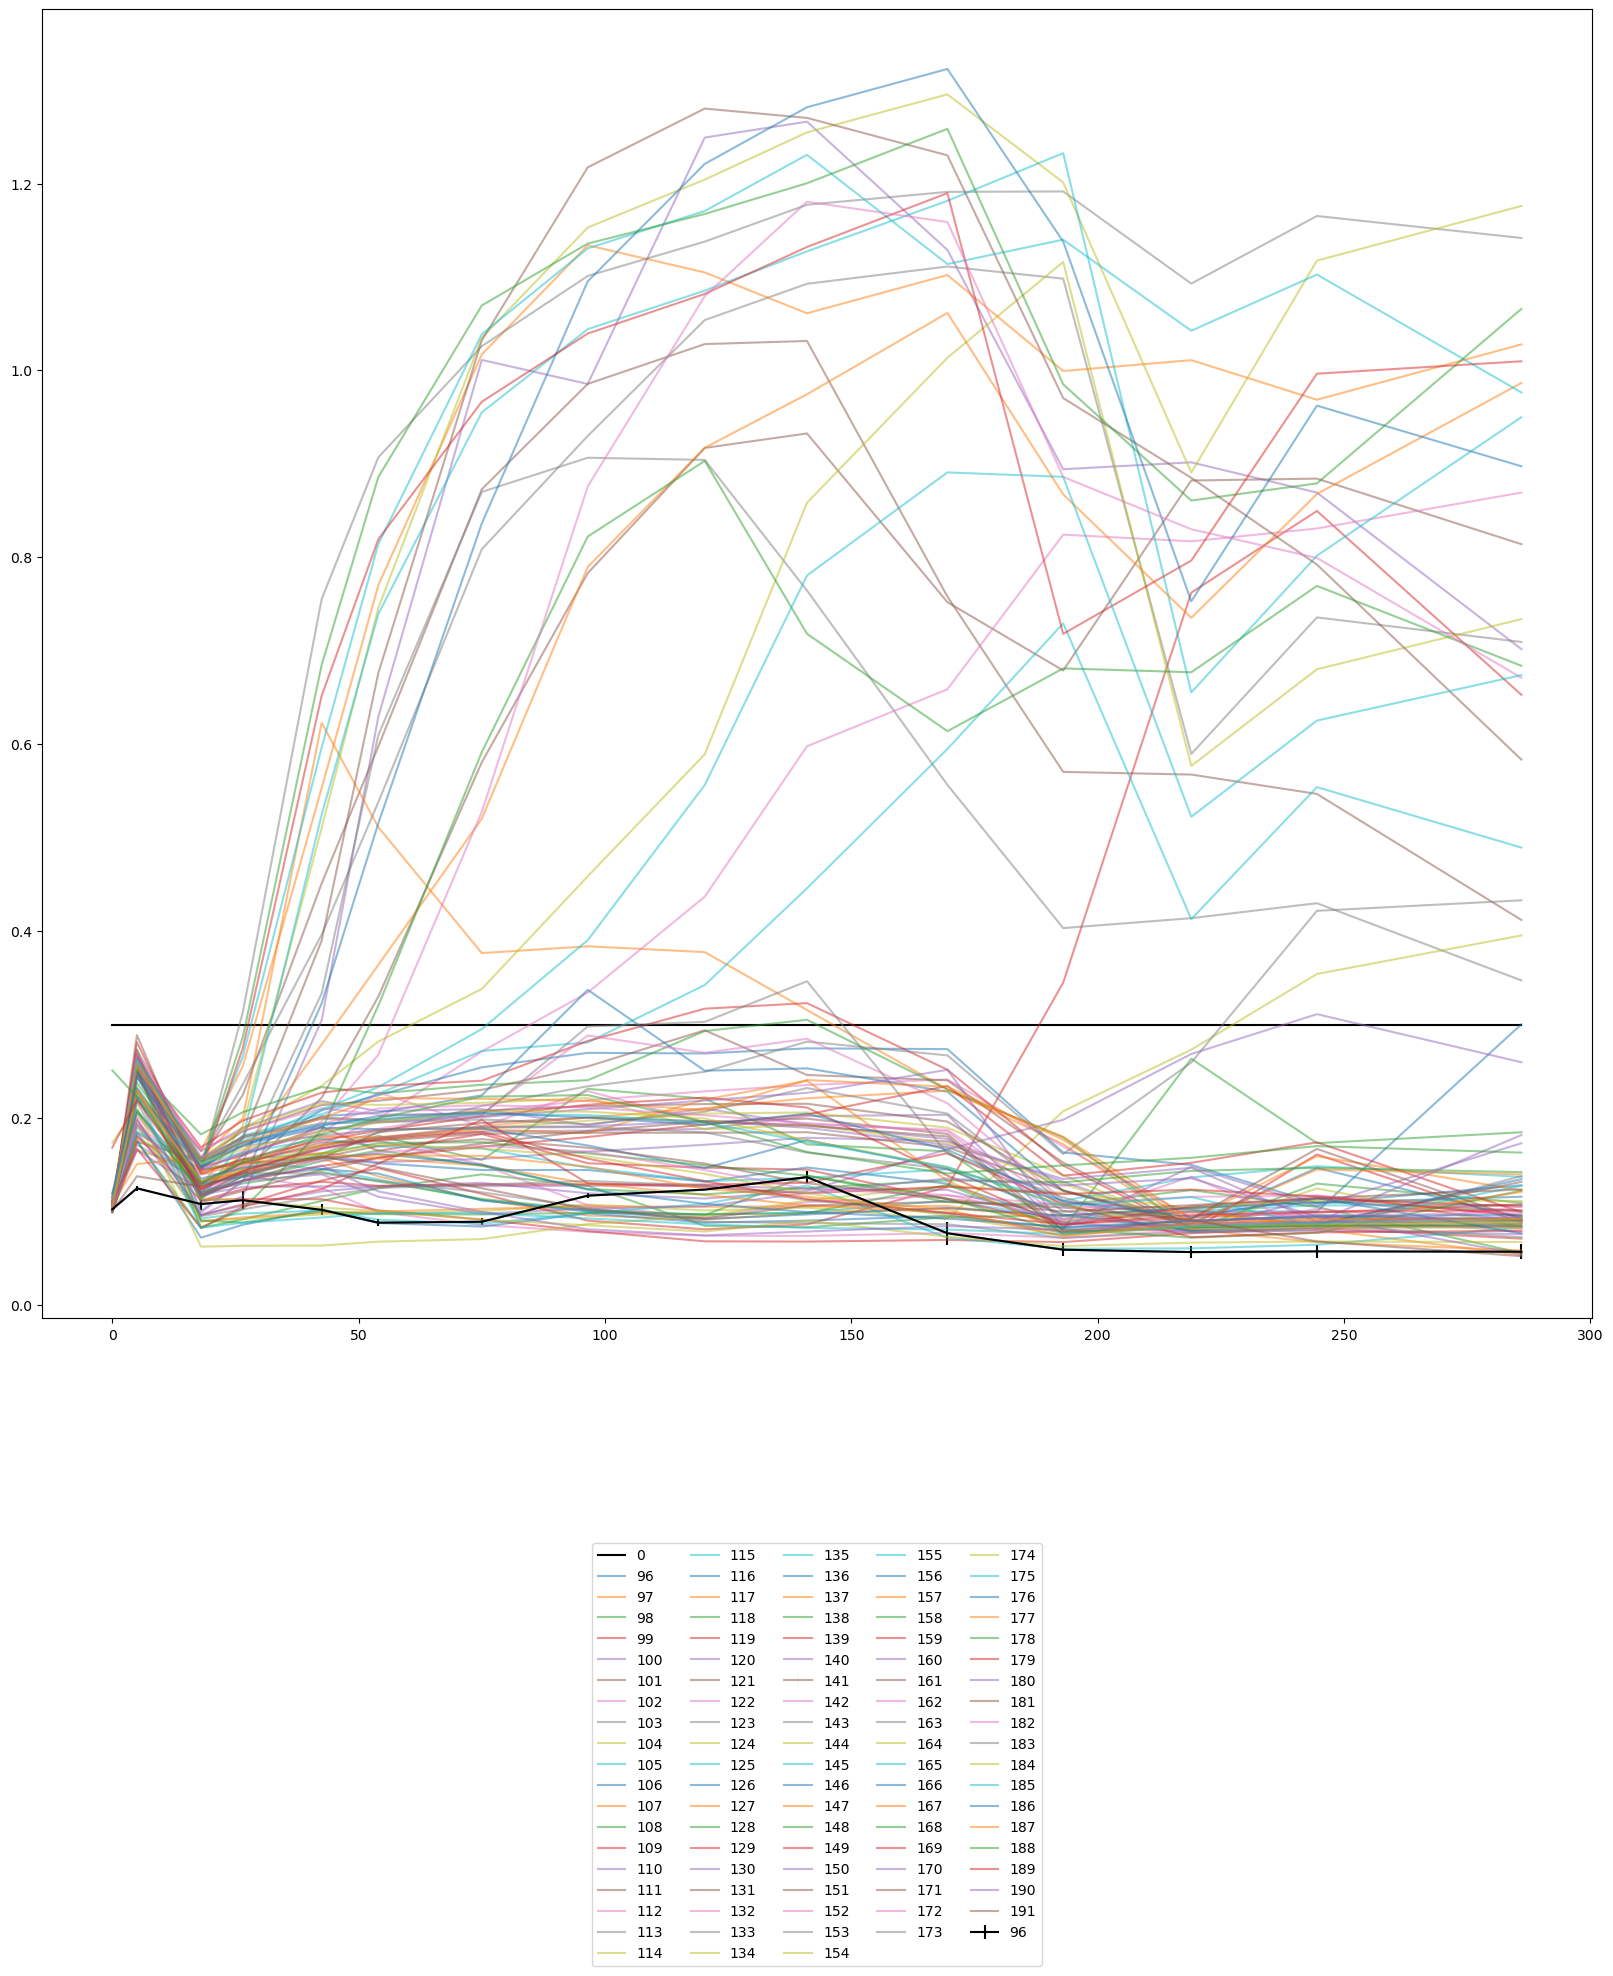

In [41]:
# for df in [PlateA_590,PlateB_590,PlateC_590]:
#     df = df.astype(float)
#     df.T.plot(legend=False)
    
# x_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).mean()
# y_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).std()
x_750 = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)],sort=False).groupby(level=0).mean()
y_750 = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)],sort=False).groupby(level=0).std()


x_750.columns = tp
y_750.columns = tp
# x1 = 

ax = x_750.T.plot(legend=True,yerr = y_750,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
x_750.iloc[0].plot(ax=ax,color='k',yerr = y_750.iloc[0],legend=False)
# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.3
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)

# x_750.loc['PM2_A6'].plot(ax=ax,color='k',yerr = y_750.loc['PM2_A6'],legend=False)
# x_750.loc['PM2_A12'].plot(ax=ax,color='k',yerr = y_750.loc['PM2_A12'],legend=False)

ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


#### lets look at the highest the individual wells got in each plate. 


In [42]:
# 750 nm wavelength. 
print(PlateD_750.iloc[0],PlateE_750.iloc[0],PlateF_750.iloc[0])

0     0.1008
1     0.1249
2     0.1017
3     0.1018
4     0.0957
5     0.0855
6     0.0931
7     0.1142
8     0.1238
9     0.1319
10    0.0766
11    0.0514
12    0.0506
13      0.05
14    0.0497
Name: 96, dtype: object 0      0.102
1     0.1273
2     0.1075
3     0.1134
4     0.1073
5     0.0921
6     0.0883
7     0.1199
8     0.1224
9     0.1437
10    0.0888
11    0.0606
12    0.0551
13     0.057
14    0.0559
Name: 96, dtype: object 0     0.1041
1      0.122
2     0.1144
3     0.1209
4      0.102
5     0.0863
6     0.0855
7     0.1165
8     0.1238
9     0.1345
10    0.0645
11    0.0651
12    0.0638
13    0.0647
14    0.0651
Name: 96, dtype: object


In [43]:
# 590 nm wavelength. 
print(PlateD_590.iloc[0],PlateE_590.iloc[0],PlateF_590.iloc[0])

0     0.0989
1      0.125
2       0.11
3     0.1053
4     0.0919
5     0.0819
6     0.0881
7     0.1094
8     0.1193
9     0.1266
10    0.0718
11    0.0579
12    0.0569
13    0.0564
14    0.0564
Name: 96, dtype: object 0     0.1002
1     0.1191
2     0.1148
3     0.1219
4      0.109
5     0.0905
6     0.0828
7     0.1095
8     0.1149
9     0.1311
10    0.0813
11    0.0658
12    0.0612
13    0.0629
14    0.0622
Name: 96, dtype: object 0     0.1011
1     0.1197
2     0.1217
3     0.1282
4     0.1016
5     0.0802
6     0.0782
7     0.1063
8     0.1133
9     0.1258
10    0.0682
11    0.0695
12    0.0692
13    0.0697
14    0.0706
Name: 96, dtype: object


the highest nm reached ~ 0.15 for both conditions. Set 0.25 as minimal for growth. 

In [44]:
temp_750 = x_750.copy()
temp_590 = x_590.copy()

In [45]:
len(plate_well[96:192])

96

In [46]:
temp_750['source']=temp_750.index
temp_750.index = plate_well[96:192]
temp_750['well_sources'] = well_sources[96:192]
temp_590['source']=temp_590.index
temp_590.index = plate_well[96:192]
temp_590['well_sources'] = well_sources[96:192]

#### obtain data above thresholds.

In [48]:
tp

[0, 5, 18, 26.5, 42.5, 54, 75, 96.5, 120.25, 141, 169.5, 193, 219, 244.5, 286]

In [49]:
# drop late datapoints. and remove noisy data. 

x2_590 = x_590.drop(columns=[0,5,193,219,244.5,286])
x2_750 = x_750.drop(columns=[0,5,193,219,244.5,286])

# y2 = y.drop(columns=[120,144,168])

obtain data above thresholds. Ensure that it is more than one datapoint. 

In [50]:
index_590 = x2_590.gt(0.35).sum(axis=1)>1
index_750 = x2_750.gt(0.35).sum(axis=1)>1
# index.to_csv('Biolog_gt_35_TF_numericalIndex.csv')

In [51]:
index_590.sum()

26

In [52]:
index_750.sum()

22

In [53]:
# only 89 values matched, thus there are 7 values that do match the growth requirements between 590 and 750 nm. 
(index_750==index_590).sum()

92

In [54]:
ind = index_750[index_750!=index_590]

In [55]:
ind.index.values

array([116, 148, 160, 188])

In [56]:
index_590[ind.index.values]

116    True
148    True
160    True
188    True
dtype: bool

In [57]:
index_750[ind.index.values]

116    False
148    False
160    False
188    False
dtype: bool

In [58]:
temp_590.iloc[0]

0.0                      0.100067
5.0                      0.121267
18.0                       0.1155
26.5                     0.118467
42.5                     0.100833
54.0                       0.0842
75.0                     0.083033
96.5                       0.1084
120.25                   0.115833
141.0                    0.127833
169.5                    0.073767
193.0                      0.0644
219.0                    0.062433
244.5                       0.063
286.0                    0.063067
source                         96
well_sources    Negative Control2
Name: PM2_A1, dtype: object

In [59]:
temp_590

0.0       5.0      18.0      26.5      42.5      54.0      75.0  \
PM2_A1   0.100067  0.121267  0.115500  0.118467  0.100833  0.084200  0.083033   
PM2_A2   0.100600  0.176700  0.152067  0.162800  0.165733  0.144333  0.117000   
PM2_A3   0.105667  0.174333  0.082267  0.092067  0.114700  0.131433  0.150333   
PM2_A4   0.114667  0.199267  0.098767  0.111533  0.140000  0.153267  0.122567   
PM2_A5   0.099967  0.184500  0.097800  0.121800  0.347933  0.692633  1.068000   
...           ...       ...       ...       ...       ...       ...       ...   
PM2_H8   0.103533  0.230167  0.136367  0.149733  0.165233  0.168233  0.166767   
PM2_H9   0.186967  0.267800  0.268867  0.316667  0.385633  0.426800  0.482800   
PM2_H10  0.163467  0.218900  0.127933  0.149600  0.175000  0.184600  0.190267   
PM2_H11  0.103300  0.198033  0.128600  0.145433  0.161067  0.133567  0.112167   
PM2_H12  0.101933  0.140000  0.131500  0.148533  0.166233  0.153333  0.131233   

             96.5    120.25     141.0     169.5     193.0     219.0     244.5  \
PM2_A1   0.108400  0.115833  0.127833  0.073767  0.064400  0.062433  0.063000   
PM2_A2   0.098633  0.094100  0.101533  0.106667  0.104800  0.109900  0.087533   
PM2_A3   0.129467  0.085733  0.084233  0.097000  0.101800  0.111567  0.119567   
PM2_A4   0.091067  0.081533  0.087733  0.134767  0.367933  0.816767  0.897467   
PM2_A5   1.064767  1.343133  1.375500  1.244000  0.980500  0.997867  0.970500   
...           ...       ...       ...       ...       ...       ...       ...   
PM2_H8   0.156633  0.132100  0.125533  0.112567  0.085233  0.101000  0.105267   
PM2_H9   0.522200  0.515667  0.504000  0.502600  0.526700  0.541433  0.559667   
PM2_H10  0.163567  0.138633  0.119367  0.105700  0.094667  0.106167  0.109667   
PM2_H11  0.096033  0.091967  0.097600  0.105667  0.104167  0.113867  0.117667   
PM2_H12  0.109667  0.101800  0.116333  0.121800  0.118033  0.102433  0.076667   

            286.0  source           well_sources  
PM2_A1   0.063067      96      Negative Control2  
PM2_A2   0.058933      97  Chondroitin Sulfate C  
PM2_A3   0.110433      98         a-Cyclodextrin  
PM2_A4   0.695300      99         b-Cyclodextrin  
PM2_A5   0.790400     100         g-Cyclodextrin  
...           ...     ...                    ...  
PM2_H8   0.108467     187             Putrescine  
PM2_H9   0.556900     188      Dihydroxy Acetone  
PM2_H10  0.113633     189         2,3-Butanediol  
PM2_H11  0.124800     190        2,3-Butanedione  
PM2_H12  0.058933     191    3-Hydroxy 2-Butanon  

[96 rows x 17 columns]

In [60]:
temp_590.index = legend[96:196]

In [61]:
temp_590.loc[ind.index.values]

0.0       5.0      18.0      26.5      42.5      54.0      75.0  \
116  0.123733  0.297500  0.316600  0.350933  0.394833  0.407467  0.433200   
148  0.116633  0.324033  0.249633  0.260467  0.290833  0.297833  0.316000   
160  0.109500  0.292300  0.218933  0.257633  0.312633  0.342700  0.385133   
188  0.186967  0.267800  0.268867  0.316667  0.385633  0.426800  0.482800   

         96.5    120.25     141.0     169.5     193.0     219.0     244.5  \
116  0.461833  0.466267  0.498267  0.497833  0.469733  0.417967  0.443733   
148  0.338267  0.351200  0.364467  0.413533  0.382800  0.394667  0.417167   
160  0.415233  0.437300  0.443667  0.443533  0.411867  0.441933  0.397000   
188  0.522200  0.515667  0.504000  0.502600  0.526700  0.541433  0.559667   

        286.0  source       well_sources  
116  0.535133     116    2-Deoxy-DRibose  
148  0.488867     148      D-Glucosamine  
160  0.506167     160    Oxalomalic Acid  
188  0.556900     188  Dihydroxy Acetone

In [62]:
temp_750.iloc[0]

0.0                        0.1023
5.0                      0.124733
18.0                     0.107867
26.5                     0.112033
42.5                     0.101667
54.0                     0.087967
75.0                     0.088967
96.5                     0.116867
120.25                   0.123333
141.0                      0.1367
169.5                    0.076633
193.0                    0.059033
219.0                      0.0565
244.5                    0.057233
286.0                      0.0569
source                         96
well_sources    Negative Control2
Name: PM2_A1, dtype: object

In [63]:
# new index set these to false
final_TF_values = index_750.copy()
final_TF_values[index_750!=index_590] = False

In [64]:
temp_750['growth'] = final_TF_values.values

#### save the dataframe.

In [65]:
temp_750

0.0       5.0      18.0      26.5      42.5      54.0      75.0  \
PM2_A1   0.102300  0.124733  0.107867  0.112033  0.101667  0.087967  0.088967   
PM2_A2   0.100133  0.165533  0.144100  0.152000  0.156633  0.137500  0.112633   
PM2_A3   0.104267  0.174867  0.082533  0.091467  0.111267  0.124733  0.139667   
PM2_A4   0.115200  0.199067  0.095833  0.107567  0.133000  0.146300  0.118867   
PM2_A5   0.099800  0.184367  0.095767  0.116433  0.304667  0.629467  1.011233   
...           ...       ...       ...       ...       ...       ...       ...   
PM2_H8   0.104200  0.228900  0.131633  0.143300  0.157867  0.160133  0.159400   
PM2_H9   0.250933  0.222400  0.130700  0.152867  0.182300  0.199833  0.222833   
PM2_H10  0.168333  0.219200  0.123867  0.143433  0.167767  0.177100  0.185133   
PM2_H11  0.100633  0.193700  0.117333  0.132967  0.148967  0.121433  0.099667   
PM2_H12  0.100200  0.137667  0.126433  0.141500  0.158933  0.147333  0.124800   

             96.5    120.25     141.0     169.5     193.0     219.0     244.5  \
PM2_A1   0.116867  0.123333  0.136700  0.076633  0.059033  0.056500  0.057233   
PM2_A2   0.095633  0.091233  0.098333  0.103300  0.095300  0.101200  0.081033   
PM2_A3   0.127333  0.084600  0.083067  0.093800  0.095767  0.104167  0.110500   
PM2_A4   0.090167  0.080833  0.086100  0.126167  0.344867  0.762167  0.849600   
PM2_A5   0.985467  1.249200  1.266167  1.128867  0.894233  0.901633  0.869267   
...           ...       ...       ...       ...       ...       ...       ...   
PM2_H8   0.147767  0.123967  0.115767  0.101733  0.073267  0.087367  0.090800   
PM2_H9   0.224533  0.195400  0.163633  0.140600  0.149267  0.157400  0.169900   
PM2_H10  0.156433  0.132400  0.113200  0.098567  0.086467  0.096067  0.099567   
PM2_H11  0.080900  0.074367  0.078467  0.084300  0.080267  0.086667  0.089100   
PM2_H12  0.102067  0.092500  0.106433  0.110367  0.104233  0.090867  0.067933   

            286.0  source           well_sources  growth  
PM2_A1   0.056900      96      Negative Control2   False  
PM2_A2   0.053367      97  Chondroitin Sulfate C   False  
PM2_A3   0.100467      98         a-Cyclodextrin   False  
PM2_A4   0.652867      99         b-Cyclodextrin   False  
PM2_A5   0.701733     100         g-Cyclodextrin    True  
...           ...     ...                    ...     ...  
PM2_H8   0.092300     187             Putrescine   False  
PM2_H9   0.162933     188      Dihydroxy Acetone   False  
PM2_H10  0.101400     189         2,3-Butanediol   False  
PM2_H11  0.094333     190        2,3-Butanedione   False  
PM2_H12  0.052133     191    3-Hydroxy 2-Butanon   False  

[96 rows x 18 columns]

In [67]:
# temp_750.to_csv('plate_2B_carbon_growth_output_750nmData.csv')

#### plots of individual plates over time. 

<Axes: >

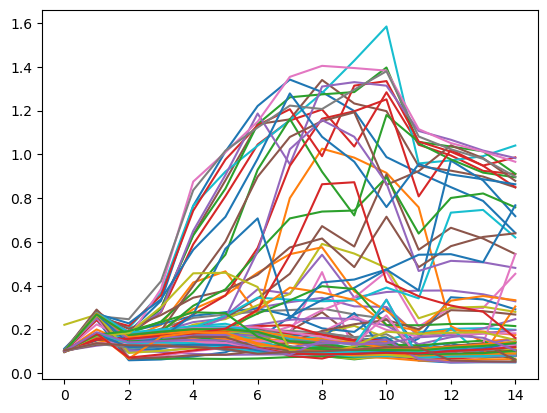

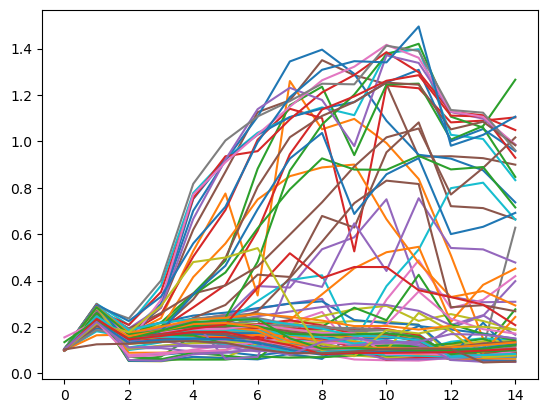

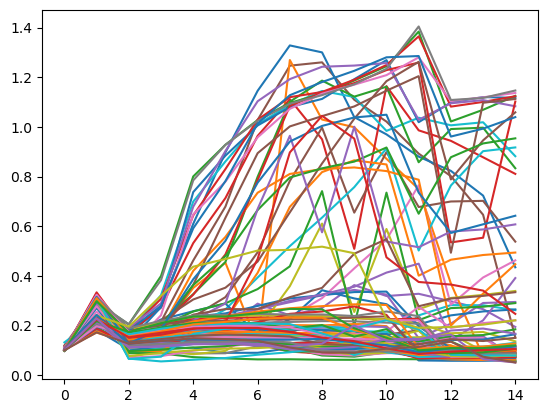

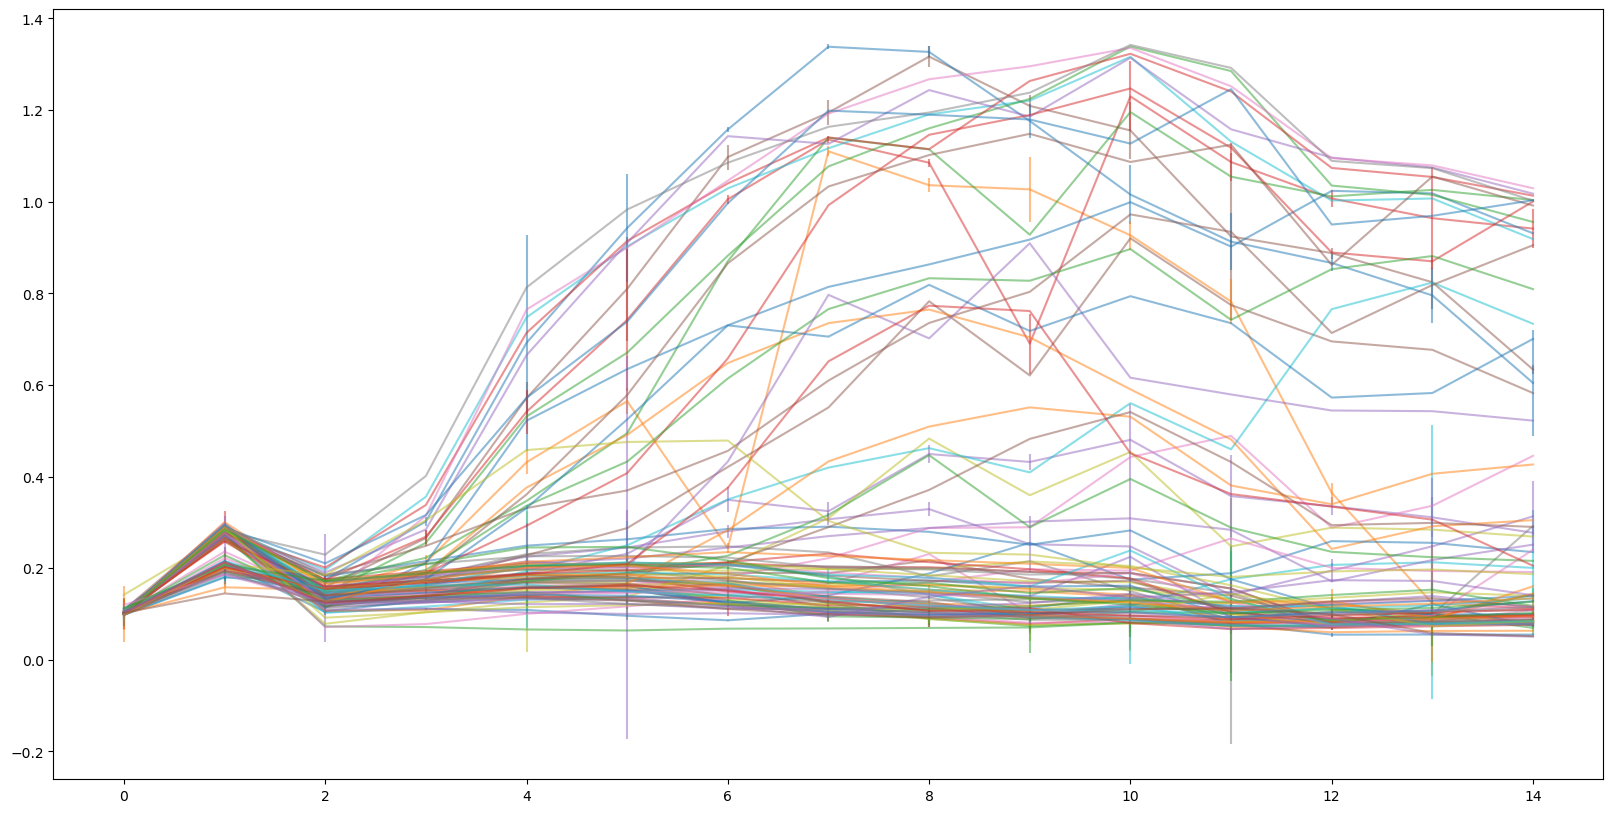

In [68]:
for df in [PlateA_750,PlateB_750,PlateC_750]:
    df = df.astype(float)
    df.T.plot(legend=False)
    
x = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)]).groupby(level=0).mean()
y = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)]).groupby(level=0).std()

x.T.plot(legend=False,yerr = y,alpha=0.5,figsize=(20,10))

<Axes: >

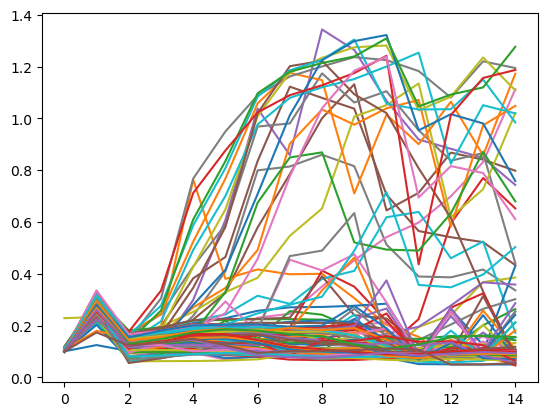

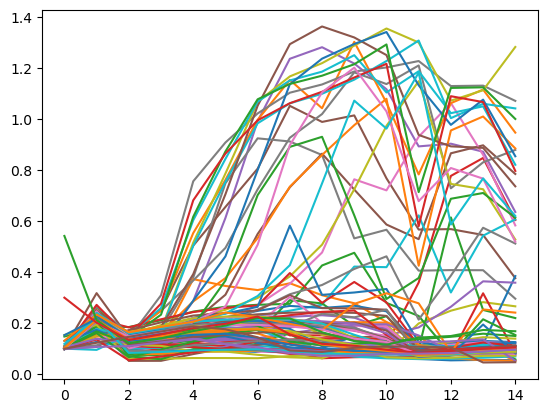

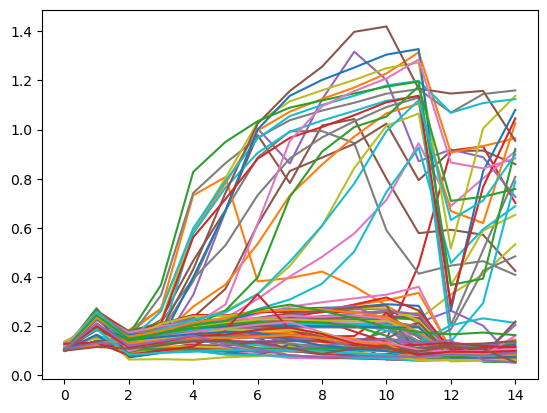

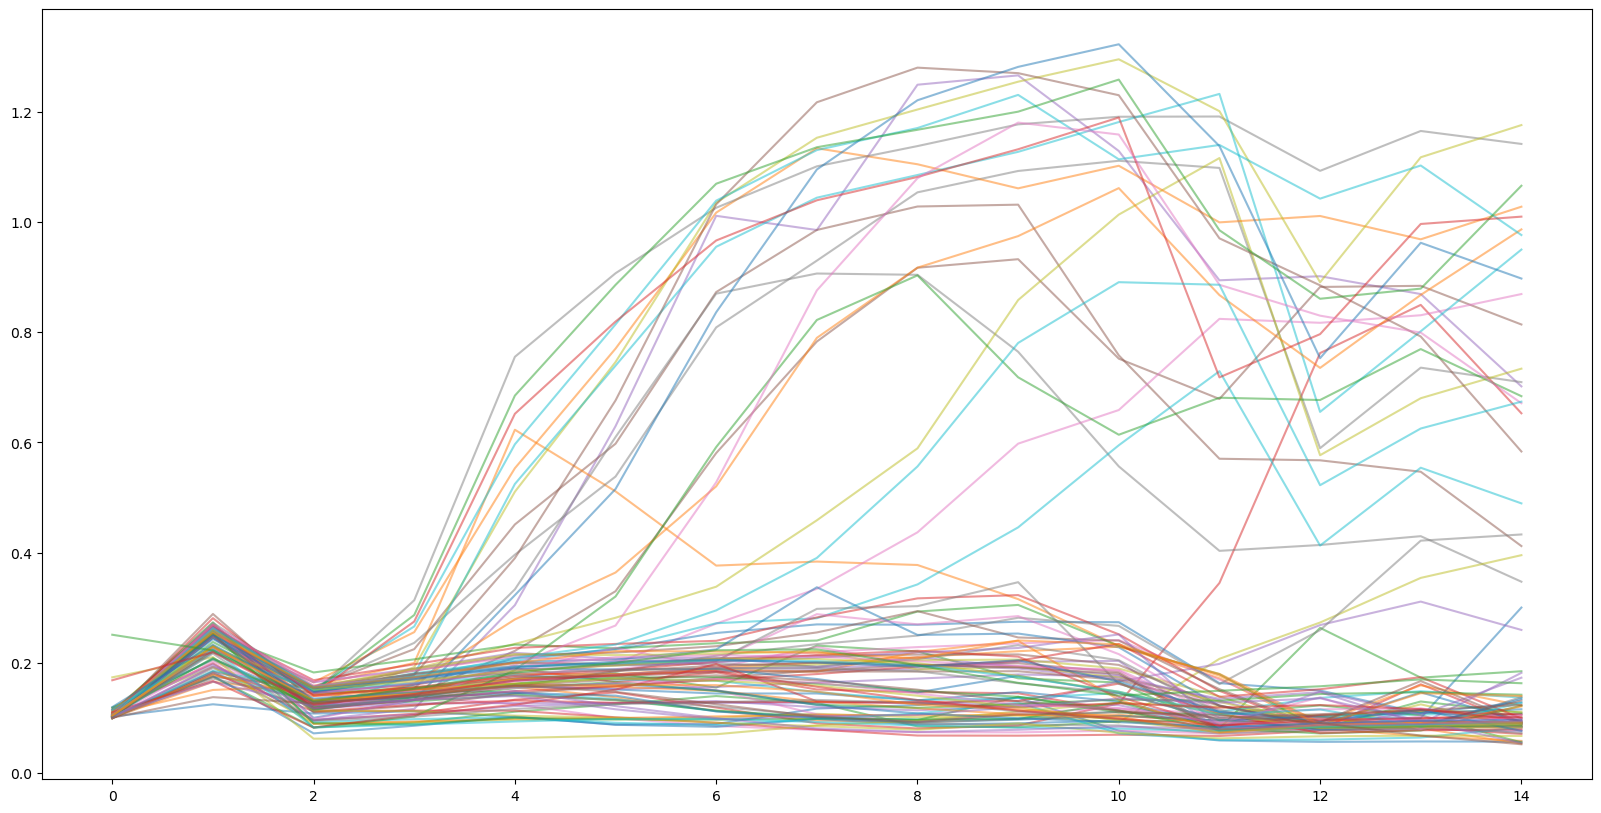

In [69]:
for df in [PlateD_750,PlateE_750,PlateF_750]:
    df = df.astype(float)
    df.T.plot(legend=False)
    
x = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).mean()
y = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).std()

x.T.plot(legend=False,yerr = y,alpha=0.5,figsize=(20,10))